In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [2]:
df = pd.read_csv("../../../../main/sub_data/single_variant/no_null/train/train_no_null.csv",index_col="Date",parse_dates=True)
df_test = pd.read_csv("../../../../main/sub_data/single_variant/no_null/test/test_no_null.csv",index_col="Date",parse_dates=True)

In [3]:
df

,Max.Demand met during the day (MW)
Date,
2013-04-01,2776.0
2013-04-02,3034.0
2013-04-03,2991.0
2013-04-04,3125.0
2013-04-05,3160.0
...,...
2023-04-26,4445.0
2023-04-27,4626.0
2023-04-28,4395.0


## Transforming Data
    
    The Steps adopted for Transformation are
<ul>
    <li>Rolling Window</li>
    <li>Outliers Replacement</li>
</ul>

In [4]:
# We use Aggregate method (for this, we need a function)
def percent_change(series):
    prev = series[:-1]
    last = series[-1:]
    change = (last-np.sum(prev))/np.sum(prev)
    return change

def replace_outliers(series):
    mean_diff = np.abs(series - np.mean(series))
    # Criteria for detecting outliers
    this_mask = mean_diff > (np.std(series) * 3)
    # replace it with median
    series[this_mask] = np.nanmedian(series)
    return series

In [5]:
'''
    Rolling : A rolling window of every size (n) is applied to every column
    After applying an n size NaN Values will be available
    
'''
df_per_ch = df.rolling(10).aggregate(percent_change).dropna()

In [6]:
percentile_we_want = [1, 10, 25, 50, 75, 90, 99]
percentile_funcs = [partial(np.percentile, q=perc) for perc in percentile_we_want ]
feature_percentile = df_per_ch["Max.Demand met during the day (MW)"].rolling(30,min_periods=5,closed='right').aggregate(percentile_funcs)

In [7]:
feature_percentile = feature_percentile.dropna()
feature_percentile.columns =['1','10','25','50','75','90','99']

In [8]:
feature_percentile

,1,10,25,50,75,90,99
Date,,,,,,,
2013-04-14,-0.892656,-0.887907,-0.879993,-0.879480,-0.878073,-0.876360,-0.875332
2013-04-15,-0.893137,-0.892714,-0.889181,-0.879736,-0.878425,-0.876646,-0.875360
2013-04-16,-0.893127,-0.892620,-0.886118,-0.879545,-0.878777,-0.876931,-0.875389
2013-04-17,-0.893118,-0.892526,-0.883055,-0.879512,-0.878493,-0.877217,-0.875417
2013-04-18,-0.893109,-0.892432,-0.880824,-0.879545,-0.878633,-0.877502,-0.875446
...,...,...,...,...,...,...,...
2023-04-26,-0.906401,-0.898938,-0.893234,-0.886729,-0.876751,-0.871568,-0.858646
2023-04-27,-0.906401,-0.898938,-0.893234,-0.886729,-0.876751,-0.871568,-0.858646
2023-04-28,-0.906401,-0.898938,-0.893234,-0.886729,-0.876751,-0.871568,-0.858646


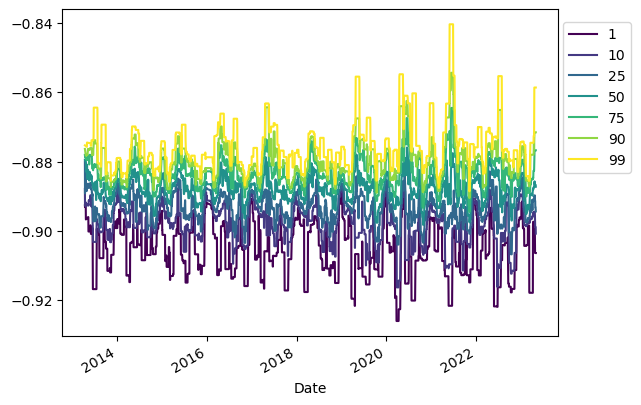

In [9]:
ax = feature_percentile.plot(cmap=plt.cm.viridis)
ax.legend(percentile_we_want, loc=(1.01, .5))
plt.show()

In [10]:
feature_percentile

,1,10,25,50,75,90,99
Date,,,,,,,
2013-04-14,-0.892656,-0.887907,-0.879993,-0.879480,-0.878073,-0.876360,-0.875332
2013-04-15,-0.893137,-0.892714,-0.889181,-0.879736,-0.878425,-0.876646,-0.875360
2013-04-16,-0.893127,-0.892620,-0.886118,-0.879545,-0.878777,-0.876931,-0.875389
2013-04-17,-0.893118,-0.892526,-0.883055,-0.879512,-0.878493,-0.877217,-0.875417
2013-04-18,-0.893109,-0.892432,-0.880824,-0.879545,-0.878633,-0.877502,-0.875446
...,...,...,...,...,...,...,...
2023-04-26,-0.906401,-0.898938,-0.893234,-0.886729,-0.876751,-0.871568,-0.858646
2023-04-27,-0.906401,-0.898938,-0.893234,-0.886729,-0.876751,-0.871568,-0.858646
2023-04-28,-0.906401,-0.898938,-0.893234,-0.886729,-0.876751,-0.871568,-0.858646


In [11]:
df_test1 = df_test.rolling(10).aggregate(percent_change).dropna()
percentile_we_want = [1, 10, 25, 50, 75, 90, 99]
percentile_funcs = [partial(np.percentile, q=perc) for perc in percentile_we_want ]
feature_percentile_test = df_test1["Max.Demand met during the day (MW)"].rolling(30,min_periods=5,closed='right').aggregate(percentile_funcs)
feature_percentile_test.columns = feature_percentile.columns

In [12]:
cols = feature_percentile.columns
X_train = feature_percentile
y_train = df.loc['2013-04-14':]
X_test = feature_percentile_test.dropna()
y_test = df_test.loc['2023-05-14':]

In [13]:
# Fit the Ridge model
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MAPE(y_test,y_pred)

0.12769214558140962

In [14]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
MAPE(y_test,y_pred)

0.15975285288856936

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
MAPE(y_pred,y_test)

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.18323337477389046

In [16]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)
MAPE(y_test,y_pred)

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.22676158217183978

## Without Rolling

In [17]:
percentile_we_want = [1, 10, 25, 50, 75, 90, 99]
percentile_funcs = [partial(np.percentile, q=perc) for perc in percentile_we_want ]
feature_percentile_no = df["Max.Demand met during the day (MW)"].rolling(30,min_periods=5,closed='right').aggregate(percentile_funcs)

In [18]:
feature_percentile_no = feature_percentile_no.dropna()
feature_percentile_no.columns =['1','10','25','50','75','90','99']

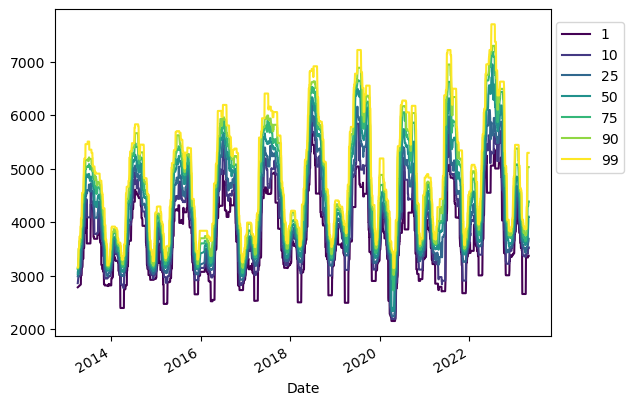

In [19]:
ax = feature_percentile_no.plot(cmap=plt.cm.viridis)
ax.legend(percentile_we_want, loc=(1.01, .5))
plt.show()

In [20]:
percentile_we_want = [1, 10, 25, 50, 75, 90, 99]
percentile_funcs = [partial(np.percentile, q=perc) for perc in percentile_we_want ]
feature_percentile_test2 = df_test["Max.Demand met during the day (MW)"].rolling(30,min_periods=5,closed='right').aggregate(percentile_funcs)
feature_percentile_test2.columns = feature_percentile.columns

In [21]:
cols = feature_percentile_no.columns
X_train_no = feature_percentile_no
y_train_no = df.loc['2013-04-05':]
X_test_no = feature_percentile_test2.dropna()
y_test_no = df_test.loc['2023-05-05':]

In [22]:
# Fit the Ridge model
model = Ridge()
model.fit(X_train_no, y_train_no)
y_pred = model.predict(X_test_no)
MAPE(y_test_no,y_pred)

0.13612073032571056

In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_no, y_train_no)
y_pred = lasso.predict(X_test_no)
MAPE(y_test_no,y_pred)

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.052e+08, tolerance: 3.558e+05
  model = cd_fast.enet_coordinate_descent(


0.1361144256112709

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
gbm.fit(X_train_no, y_train_no)
y_pred = gbm.predict(X_test_no)
MAPE(y_pred,y_test_no)

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1417897443227689

In [25]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no)
X_test_scaled = scaler.transform(X_test_no)
svr = SVR()
svr.fit(X_train_scaled, y_train_no)
y_pred = svr.predict(X_test_scaled)
MAPE(y_test_no,y_pred)

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.147135071190377